In [1]:
!git clone https://github.com/sshuh1215/SAMSUNG_AI_EXPERT_Action_Recognition.git
%cd ./SAMSUNG_AI_EXPERT_Action_Recognition/1_preprocessing/

Cloning into 'SAMSUNG_AI_EXPERT_Action_Recognition'...
remote: Enumerating objects: 49586, done.
remote: Total 49586 (delta 0), reused 0 (delta 0), pack-reused 49586 (from 1)
Receiving objects: 100% (49586/49586), 582.98 MiB | 21.71 MiB/s, done.
Resolving deltas: 100% (1262/1262), done.
Updating files: 100% (48410/48410), done.
/content/SAMSUNG_AI_EXPERT_Action_Recognition/1_preprocessing


In [2]:
!pip install ffmpeg-python

!pkg-config --modversion opencv
!sudo apt-get purge libopencv* python-opencv
!pip install opencv-python

Package opencv was not found in the pkg-config search path.
Perhaps you should add the directory containing `opencv.pc'
to the PKG_CONFIG_PATH environment variable
Package 'opencv', required by 'virtual:world', not found
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libopencv3.4-java' for glob 'libopencv*'
Note, selecting 'libopencv4.5d-jni' for glob 'libopencv*'
Note, selecting 'libopencv-videoio4.5d' for glob 'libopencv*'
Note, selecting 'libopencv-objdetect4.5d' for glob 'libopencv*'
Note, selecting 'libopencv-gpu-dev' for glob 'libopencv*'
Note, selecting 'libopencv-videoio-dev' for glob 'libopencv*'
Note, selecting 'libopencv-superres4.5d' for glob 'libopencv*'
Note, selecting 'libopencv-objdetect-dev' for glob 'libopencv*'
Note, selecting 'libopencv-contrib4.5d' for glob 'libopencv*'
Note, selecting 'libopencv-superres-dev' for glob 'libopencv*'
Note, selecting 'libopencv4.0-java' for glob 'libopencv*'
Note, sele

In [3]:
!mkdir frames

# Tutorial on video analysis

In [4]:
# Import Libraries
from matplotlib import pyplot as plt # To Visualize
import ffmpeg                        # To Handle Video
import numpy as np                   # To Handle Array
import os                            # To Handle OS
import cv2                           # To Handle Image/Video

### Get Video Information

In [5]:
# Load Video
vid = cv2.VideoCapture('sample_vid.avi')
print('Height of the frames : {}'.format(vid.get(4)))
print('Width of the frames : {}'.format(vid.get(3)))
print('Frame rates (FPS) of the video : {}'.format(vid.get(5)))
print('Total frames included in the video : {}'.format(vid.get(7)))

Height of the frames : 240.0
Width of the frames : 320.0
Frame rates (FPS) of the video : 25.0
Total frames included in the video : 119.0


In [6]:
print('Height of the frames : {}'.format(vid.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('Width of the frames : {}'.format(vid.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Frame rates (FPS) of the video : {}'.format(vid.get(cv2.CAP_PROP_FPS)))
print('Total frames included in the video : {}'.format(vid.get(cv2.CAP_PROP_FRAME_COUNT)))

Height of the frames : 240.0
Width of the frames : 320.0
Frame rates (FPS) of the video : 25.0
Total frames included in the video : 119.0


## Convert Video to the Video with Different Frame Rate (FPS)

In [7]:
# First form
if os.path.exists('downsample_vid.avi'):
    os.remove('downsample_vid.avi')
(
    ffmpeg
    .input('sample_vid.avi')
    .filter('fps', fps=10, round='up')
    .output('downsample_vid.avi')
    .run()
)

(None, None)

## Check the Difference

In [9]:
vid = cv2.VideoCapture('downsample_vid.avi')
print('Height of the frames : {}'.format(vid.get(4)))
print('Width of the frames : {}'.format(vid.get(3)))
print('Frame rates (FPS) of the video : {}'.format(vid.get(5)))
print('Total frames included in the video : {}'.format(vid.get(7)))

Height of the frames : 240.0
Width of the frames : 320.0
Frame rates (FPS) of the video : 10.0
Total frames included in the video : 48.0


## Extract frames from the video with scaling

In [10]:
# Second form
ffmpeg.input('sample_vid.avi').filter('fps', fps=5, round='up').filter('scale',200,100).output('frames/frame_%02d.jpg').run()

(None, None)

['frame_02.jpg', 'frame_03.jpg', 'frame_04.jpg', 'frame_05.jpg', 'frame_06.jpg', 'frame_07.jpg']


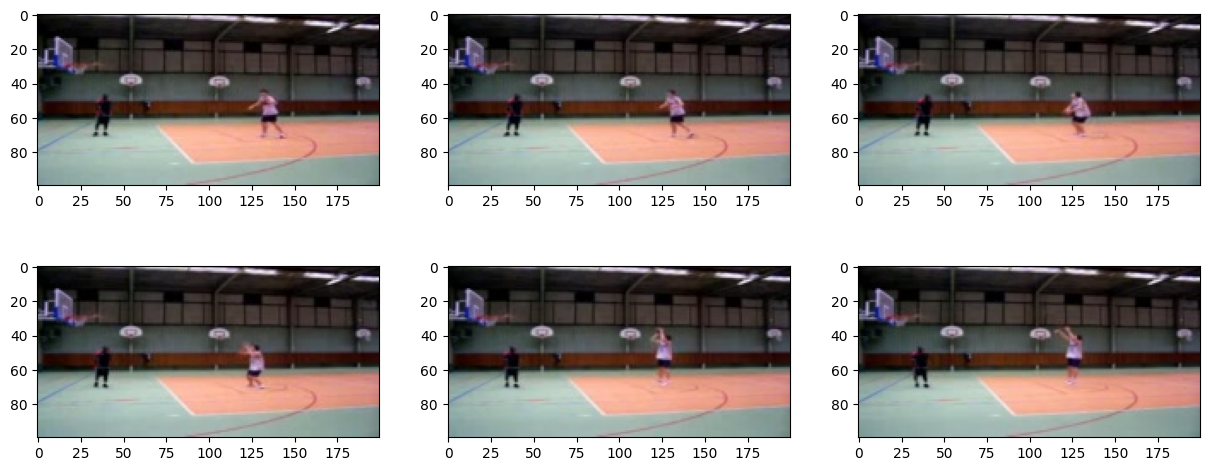

In [11]:
# Visualizing the extrated frames
frames = sorted(os.listdir('frames'))[1:7]
print(frames)
fig, axs = plt.subplots(2, 3, figsize=(15, 6))
axs = axs.ravel()

for i in range(len(frames)):
    img_path = os.path.join('frames',frames[i])
    img = cv2.imread(img_path)
    axs[i].imshow(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB))

# Optical Flow

In [12]:
def ToImg(raw_flow,bound):
    '''
    this function scale the input pixels to 0-255 with bi-bound
    raw_flow: input raw pixel value (not in 0-255)
    bound: upper and lower bound (-bound, bound)
    :return: pixel value scale from 0 to 255
    '''
    flow=raw_flow
    flow[flow>bound]=bound
    flow[flow<-bound]=-bound   # (-bound ~ bound)
    flow-=-bound               # (0 ~ 2*bound)
    flow*=(255/float(2*bound))
    return flow

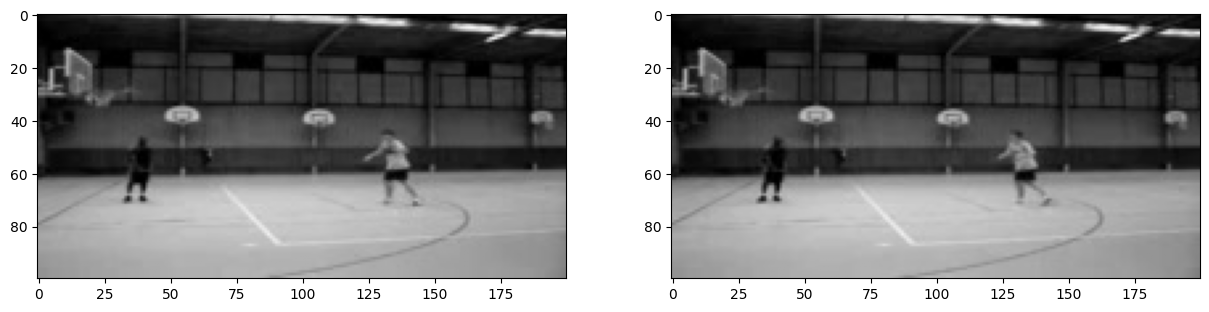

In [13]:
# Extract the TVL1 optical flow from the first 2 frames
frame_0 = os.path.join('frames', frames[0])
frame_0 = cv2.imread(frame_0,0)
frame_1 = os.path.join('frames', frames[1])
frame_1 = cv2.imread(frame_1,0)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].imshow(frame_0, cmap='gray', vmin=0, vmax=255)
axs[1].imshow(frame_1, cmap='gray', vmin=0, vmax=255)

In [15]:
bound = 5
# dtvl1=cv2.createOptFlow_DualTVL1()
dtvl1=cv2.optflow.DualTVL1OpticalFlow_create()
flowDTVL1=dtvl1.calc(frame_0,frame_1,None)

flow_x=ToImg(flowDTVL1[...,0],bound) # Motion difference along the X axis
flow_y=ToImg(flowDTVL1[...,1],bound) # Motion difference along the Y axis


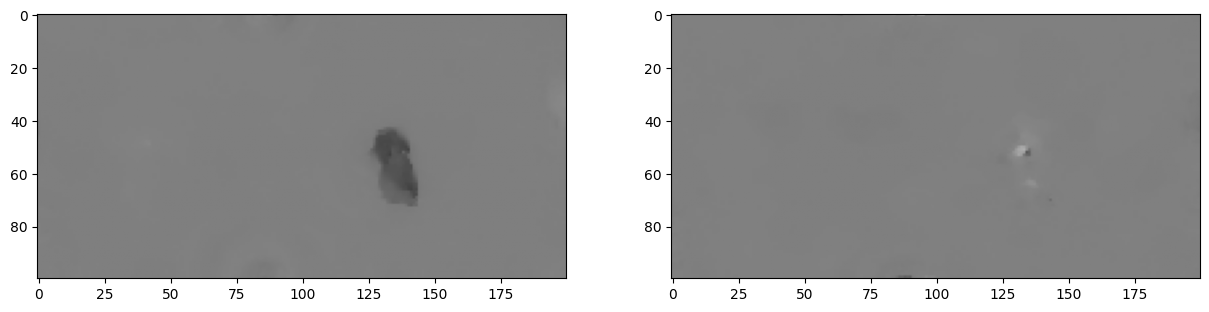

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].imshow(flow_x, cmap='gray', vmin=0, vmax=255)
axs[1].imshow(flow_y, cmap='gray', vmin=0, vmax=255)

# EXERCISE 1 :
Use sample_vid2.avi, extract "flipped & center cropped" frames with 5fps, and extract optical flow frames

In [18]:
vid2 = cv2.VideoCapture('sample_vid2.avi')
print('Height of the frames : {}'.format(vid2.get(4)))
print('Width of the frames : {}'.format(vid2.get(3)))
print('Frame rates (FPS) of the video : {}'.format(vid2.get(5)))
print('Total frames included in the video : {}'.format(vid2.get(7)))

Height of the frames : 240.0
Width of the frames : 320.0
Frame rates (FPS) of the video : 29.97002997002997
Total frames included in the video : 201.0


In [ ]:
'''
TO DO:
Following the example above, extract optical flow frames
1) 5fps
2) Horizontally flipped : hflip()
3) center cropped (100,100) : crop(x,y,width,height)
'''

In [19]:
'''
1) Run FFmpeg here
'''

(None, None)

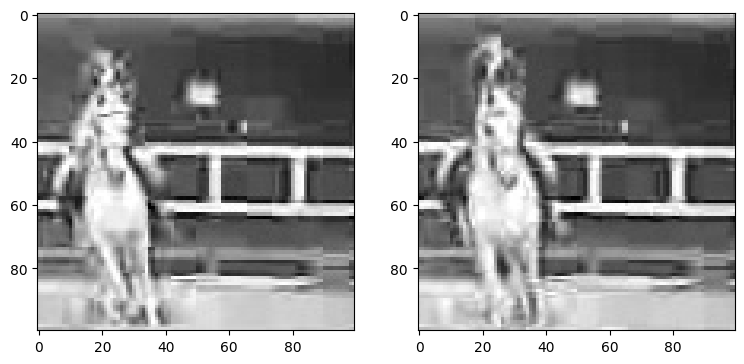

In [20]:
'''
2) Extract Optical Flow Frames
Visualize input images
'''

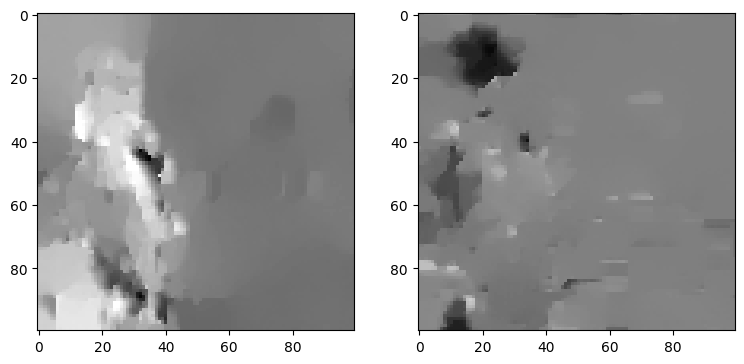

In [21]:
'''
2) Extract Optical Flow Frames
Visualize optical flow
'''